In [3]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM ,Dropout ,CuDNNLSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import keras
import ast
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Using TensorFlow backend.


NameError: name 'core' is not defined

In [2]:
# X_train = np.random.randint(10,size=(1000,3,220))
# Y_train = np.random.randint(2,size=(1000))

# X_test = np.random.randint(10,size=(500,3,220))
# Y_test = np.random.randint(2,size=(500))

In [78]:
# X_train[0][0]
pickle_in = open("./Final_Data/Invalid_processed_science1.pickle","rb")
invalid_data = pickle.load(pickle_in)

pickle_in = open("./Final_Data/Valid_processed_science1.pickle","rb")
valid_data = pickle.load(pickle_in)


In [79]:
print(len(invalid_data))
len(valid_data)

800


1393

In [80]:
print(invalid_data.info())
print("----------------------------------------------")
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
Doc_embeddings     800 non-null object
Summarizations     800 non-null object
Word_embeddings    800 non-null object
collection_ids     800 non-null object
descriptions       800 non-null object
lda_topics         800 non-null object
resource_ids       800 non-null object
sequence_ids       800 non-null object
titles             800 non-null object
label              800 non-null int64
dtypes: int64(1), object(9)
memory usage: 62.6+ KB
None
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
collection_ids     1393 non-null object
resource_ids       1393 non-null object
sequence_ids       1393 non-null object
descriptions       1393 non-null object
Summarizations     1393 non-null object
lda_topics         1393 non-null object
titles             1393 non-null object
Word_embeddings 

In [81]:
def prepare_data(df,window_size):
    frame = []
    label=[]
    for index,row in df.iterrows():
        for i in range(0,len(row["Word_embeddings"])- window_size+1):
#                 print(len(row["Word_embeddings"]))
                temp = []
                data1=[]
                data2=[]
                data3=[]
                
                data1 += row["Word_embeddings"][i]
                data2 += row["Word_embeddings"][i+1]
                data3 += row["Word_embeddings"][i+2]
                
                                
                data1 += row["Doc_embeddings"][i]
                data2 += row["Doc_embeddings"][i+1]
                data3 += row["Doc_embeddings"][i+2]
                
                for j in range(0,20):
                    data1 += [row["lda_topics"][i][j][1]]
                    data2 += [row["lda_topics"][i+1][j][1]]
                    data3 += [row["lda_topics"][i+2][j][1]]
                
                temp.append(data1)
                temp.append(data2)                
                temp.append(data3)                
                frame.append(temp) 
                label.append(row["label"])
    return frame,label
    

In [82]:
result = pd.concat([valid_data,invalid_data],ignore_index=True)


/home/bukka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [83]:
final = shuffle(result,random_state = 2019)
# final.head(10)

In [84]:
X,y = prepare_data(final,3)

In [85]:
zeo=0
one =0
for i in y:
    if(i==0):zeo+=1
    if(i==1):one+=1
print(zeo,one)        

2400 2399


In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.30, random_state=2019)
X_train,Y_train,X_test,Y_test = np.array( X_train),np.array(Y_train),np.array(X_test),np.array(Y_test) 

In [87]:
len(X_train)

3359

In [109]:
model = Sequential()
model.add(LSTM(128,
    input_shape=(X_train.shape[1:]),
    activation='relu',
    kernel_regularizer=keras.regularizers.l1_l2(l1=1e-3, l2=1e-3),
    return_sequences = True))
# model.add(LSTM(128,input_shape=(X_train.shape[1:]),activation='relu',return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

opt = keras.optimizers.Adam(lr = 1e-4)

model.compile(loss='sparse_categorical_crossentropy',optimizer = opt ,metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 3, 128)            178688    
_________________________________________________________________
lstm_22 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_21 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 66        
Total params: 314,466
Trainable params: 314,466
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
history = model.fit(X_train,Y_train,epochs = 50 , validation_data =(X_test,Y_test),batch_size= 64)

Train on 3359 samples, validate on 1440 samples
Epoch 1/50
3359/3359 [==============================] - 6s 2ms/step - loss: 5.7703 - acc: 0.5073 - val_loss: 5.4510 - val_acc: 0.5021
Epoch 2/50
3359/3359 [==============================] - 1s 354us/step - loss: 5.1633 - acc: 0.5266 - val_loss: 4.8662 - val_acc: 0.5097
Epoch 3/50
3359/3359 [==============================] - 1s 361us/step - loss: 4.5994 - acc: 0.5329 - val_loss: 4.3242 - val_acc: 0.5285
Epoch 4/50
3359/3359 [==============================] - 1s 370us/step - loss: 4.0780 - acc: 0.5284 - val_loss: 3.8242 - val_acc: 0.5444
Epoch 5/50
3359/3359 [==============================] - 1s 335us/step - loss: 3.5982 - acc: 0.5323 - val_loss: 3.3652 - val_acc: 0.5646
Epoch 6/50
3359/3359 [==============================] - 1s 347us/step - loss: 3.1587 - acc: 0.5517 - val_loss: 2.9463 - val_acc: 0.5778
Epoch 7/50
3359/3359 [==============================] - 1s 341us/step - loss: 2.7586 - acc: 0.5540 - val_loss: 2.5657 - val_acc: 0.5528
Ep

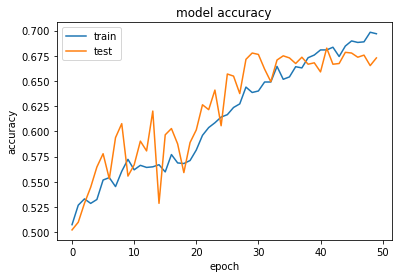

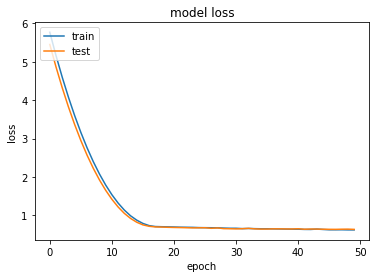

In [111]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
model.evaluate(X_test,Y_test)

1440/1440 [==============================] - 0s 178us/step


[0.6306233286857605, 0.6729166666666667]

In [92]:
y_pred =  model.predict(X_test)

In [56]:
# keras library import  for Saving and loading model and weights

from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("./Final_Data/Validator_windowsize_3_archi1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("./Final_Data/Validator_windowsize_3_weights1.h5")

In [57]:
# from keras.models import model_from_json

# # Model reconstruction from JSON file
# with open('./Final_Data/Validator_windowsize_3_archi1.json', 'r') as f:
#     model1 = model_from_json(f.read())

# # Load weights into the new model
# model1.load_weights('./Final_Data/Validator_windowsize_3_weights1.h5')


In [93]:
Y_pred = model.predict_classes(X_test)

In [94]:
precision_score(Y_test, Y_pred)

0.762214983713355

In [95]:
recall_score(Y_test, Y_pred)

0.65

In [96]:
array = confusion_matrix(Y_test, Y_pred)

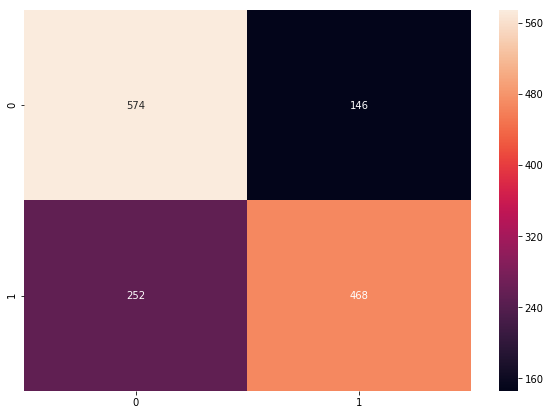

In [97]:
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt="d")

In [203]:
def Test(val):
    a = np.reshape(final.values[val],(1,10))
    a = pd.DataFrame(a,columns=final.columns)
    X,y = prepare_data(a,3)
    a.head()
    
    f = open("./Final_Data/Genetrated collections/test_col"+str(val),"w")

    sen = a.Summarizations[0]
    for i in range(0,len(sen)-2):
        f.write(sen[i]+"\n")
        f.write(sen[i+1]+"\n")
        f.write(sen[i+2]+"\n")
        f.write("-------------------------------------------------------------------------\n")
        f.write("model predction is: " + str(model1.predict(np.reshape(X[0],(1,3,220)))[0][1]))
        f.write("\n-------------------------------------------------------------------------\n")
        f.write("actual label is:" +str(y[i]))
        f.write("\n=======================================================================\n")
    return    

In [204]:
Test(0)
Test(1)
Test(2)
Test(3)
Test(4)
Test(5)
Test(6)
Test(7)

In [1]:
a="atom composed subatomic particle proton neutron electronsthe chemical property element determined electron arrangedwhat suppose would cause atom lose electronnational standard benchmark science literacy 4dh1 atom made positively charged nucleus surrounded negatively charged electronsthe nucleus composed proton neutron roughly mass differ proton positively charged neutron electric charge snb op15 take 5 bullet note scroll click launch complete activity"
b="element shell k l n p 2 ne 2 8 ar 2 8 8 kr 2 8 18 8 xe 2 8 18 18 8 rn 2 8 18 32 18 8 octet rule atom form ion combine compound obtain electron configuration nearest noble gas usually mean 8 outer electronsthe octet rule ion formation stated atom form ion seek electron configuration like nearest noble gasnearest refers number representative element element noble gasthere three way illustrate this q5 use three method chemical reaction equation br diagram lewis diagram show bond form between li cl mg follow octet rule 2e 8e 1e 11p 12n0 7e 8e 2e 17p 18n0 1e 2e 8e 11p 12n0 8e 8e 2e 17p 18n0 ionic bonding involves formation ion metal lose electron become positive ion nonmetal gain electron become negative ionslets look bond formed h f bohrrutherford 9p 10n0 9p 10n0 1p 0n0 1p 0n0 lewis diagram notice h f share electron able complete outer shell read text additional instruction learning objective necessary"
c="atom number proton different number neutron called the neutral atom isotope element stuck step confusedto made mistake twovideo nuclear chemistry nuclear change nuclear reaction scientist atomic model atomic description bohr isotope notation proton neutron electron 164 dy summary page 3 5ms print take note notebook using main topic shown aligned cornell note"